- **Nama:** Aulia Afifah
- **ID Dicoding:** auliaafifah253
- Kaggle: https://www.kaggle.com/datasets/tawfikelmetwally/air-quality-dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Air Quality.csv')
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [3]:
df = df.drop(columns=['Unnamed: 15', 'Unnamed: 16'])

In [4]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


In [6]:
df.isnull().sum()

Date             114
Time             114
CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64

In [7]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce').dt.time

In [8]:
df['Date'] = df['Date'].fillna(method='ffill')
df['Time'] = df['Time'].fillna(method='ffill')
df['CO(GT)'] = df['CO(GT)'].fillna(df['CO(GT)'].mean())
df['PT08.S1(CO)'] = df['PT08.S1(CO)'].fillna(df['PT08.S1(CO)'].mean())
df['NMHC(GT)'] = df['NMHC(GT)'].fillna(df['NMHC(GT)'].mean())
df['C6H6(GT)'] = df['C6H6(GT)'].fillna(df['C6H6(GT)'].mean())
df['PT08.S2(NMHC)'] = df['PT08.S2(NMHC)'].fillna(df['PT08.S2(NMHC)'].mean())
df['NOx(GT)'] = df['NOx(GT)'].fillna(df['NOx(GT)'].mean())
df['PT08.S3(NOx)'] = df['PT08.S3(NOx)'].fillna(df['PT08.S3(NOx)'].mean())
df['NO2(GT)'] = df['NO2(GT)'].fillna(df['NO2(GT)'].mean())
df['PT08.S4(NO2)'] = df['PT08.S4(NO2)'].fillna(df['PT08.S4(NO2)'].mean())
df['PT08.S5(O3)'] = df['PT08.S5(O3)'].fillna(df['PT08.S5(O3)'].mean())
df['T'] = df['T'].fillna(df['T'].mean())
df['RH'] = df['RH'].fillna(df['RH'].mean())
df['AH'] = df['AH'].fillna(df['AH'].mean())

In [9]:
df.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [10]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-10-03,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004-10-03,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2004-10-03,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004-10-03,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004-10-03,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


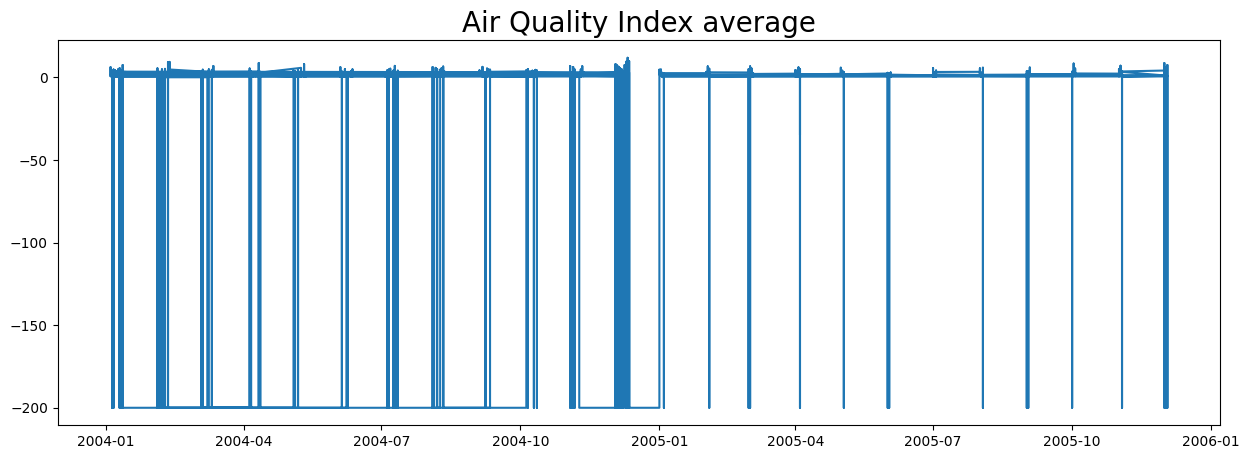

In [11]:
dates = df['Date'].values
quality  = df['CO(GT)'].values


plt.figure(figsize=(15,5))
plt.plot(dates, quality)
plt.title('Air Quality Index average',
          fontsize=20);

In [12]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [13]:
X = df['Date'].map(pd.Timestamp.toordinal).values.reshape(-1, 1)
y = df['CO(GT)'].values

In [14]:
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X = scaler_X.fit_transform(df['Date'].map(pd.Timestamp.toordinal).values.reshape(-1, 1))
y = scaler_y.fit_transform(df[['CO(GT)']])

In [15]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)

In [16]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    if shuffle_buffer > 0:
        ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [17]:
window_size = 60
batch_size = 100
shuffle_buffer = 1000

In [18]:
train_set = windowed_dataset(y_train, window_size, batch_size, shuffle_buffer)
val_set = windowed_dataset(y_val, window_size, batch_size, shuffle_buffer)

In [19]:
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(30, return_sequences=True, input_shape=(window_size, 1)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(30, return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(30),
    tf.keras.layers.Dense(15, activation='relu'),
    tf.keras.layers.Dense(7, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [20]:
optimizer = tf.keras.optimizers.SGD(lr=1.0000e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set,epochs=15)

Epoch 1/15
76/76 [==============================] - 28s 168ms/step - loss: 0.0956 - mae: 0.3358
Epoch 2/15
76/76 [==============================] - 8s 101ms/step - loss: 0.0478 - mae: 0.2228
Epoch 3/15
76/76 [==============================] - 8s 102ms/step - loss: 0.0310 - mae: 0.1485
Epoch 4/15
76/76 [==============================] - 9s 116ms/step - loss: 0.0273 - mae: 0.1212
Epoch 5/15
76/76 [==============================] - 9s 120ms/step - loss: 0.0257 - mae: 0.1176
Epoch 6/15
76/76 [==============================] - 9s 114ms/step - loss: 0.0246 - mae: 0.1140
Epoch 7/15
76/76 [==============================] - 8s 101ms/step - loss: 0.0239 - mae: 0.1097
Epoch 8/15
76/76 [==============================] - 9s 114ms/step - loss: 0.0230 - mae: 0.1060
Epoch 9/15
76/76 [==============================] - 9s 116ms/step - loss: 0.0228 - mae: 0.1053
Epoch 10/15
76/76 [==============================] - 9s 116ms/step - loss: 0.0225 - mae: 0.1059
Epoch 11/15
76/76 [=============================

In [21]:
loss, mae = model.evaluate(val_set)

print(f"Loss pada set validasi yaitu: {loss}")
print(f"MAE pada set validasi yaitu: {mae}")

19/19 [==============================] - 3s 56ms/step - loss: 0.0161 - mae: 0.0876
Loss pada set validasi yaitu: 0.016050489619374275
MAE pada set validasi yaitu: 0.08760406076908112


In [22]:
y_min = y.min()
y_max = y.max()
threshold_mae = (y_max - y_min) * 10 / 100

print(f"Ambang batas MAE yaitu: {threshold_mae:.4f}")

if mae < threshold_mae:
    print(f"Memenuhi kriteria yang mengharuskan model memiliki nilai MAE < 10% skala data yaitu: {mae:.4f}")
else:
    print(f"Tidak memenuhi kriteria yang mengharuskan model memiliki nilai MAE < 10% skala data yaitu: {mae:.4f}")

Ambang batas MAE yaitu: 0.1000
Memenuhi kriteria yang mengharuskan model memiliki nilai MAE < 10% skala data yaitu: 0.0876
